## Bike Sharing Assignment 
#### Author: Mahalakshmi Totad

#### Problem Statement :
To build a multiple linear regression model for the prediction of demand for shared bikes. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

##### Specifically, the company wants to understand the factors affecting the demand for these shared bikes in the American market. 

#### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal::
-  To build a model that captures the demand for shared bikes using the available independent variables.
-  The model can be used by the management to understand how exactly the demands vary with different features.
-  It can also be used by management to understand the demand dynamics of a new market. 


## Exploratory Data Analysis  

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Data sourcing

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

from sklearn.metrics import mean_squared_error, r2_score


In [3]:
bikeSharing = pd.read_csv("day.csv")

In [4]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikeSharing.shape

(730, 16)

In [6]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data cleaning

#### Drop unused/redundant columns

In [8]:
# instant is record index hence of no use
bikeSharing.drop(['instant'], axis = 1, inplace = True)

In [9]:
bikeSharing.shape

(730, 15)

- Target Variable is cnt: count of total rental bikes including both casual and registered.
- The model should be built taking this 'cnt' as the target variable which makes 'casual', 'registered' as redundat. Hence remove them

In [10]:
bikeSharing.drop(['casual'], axis = 1, inplace = True)

In [11]:
bikeSharing.drop(['registered'], axis = 1, inplace = True)

In [12]:
bikeSharing.shape

(730, 13)

#### Check for Missing/null values.

In [13]:
bikeSharing.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Observation: Seems like there are no missing or null values.

## Step 2: Data Preparation

In [14]:
bikeSharing.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

- convert  feature values into categorical string values before proceeding with model building

In [15]:
bikeSharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
bikeSharing.weathersit.replace({1:'Clear',2:'Mist',3:'LightSnow',4:'HeavyRain'},inplace = True)

In [17]:
bikeSharing.mnth = bikeSharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [18]:
bikeSharing.weekday =  bikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [19]:
# bikeSharing.yr.replace({0:'2018',1:'2019'},inplace = True)

In [20]:
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

#### Visualising Numeric Variables


Standardising Values 
- Handle Outliers

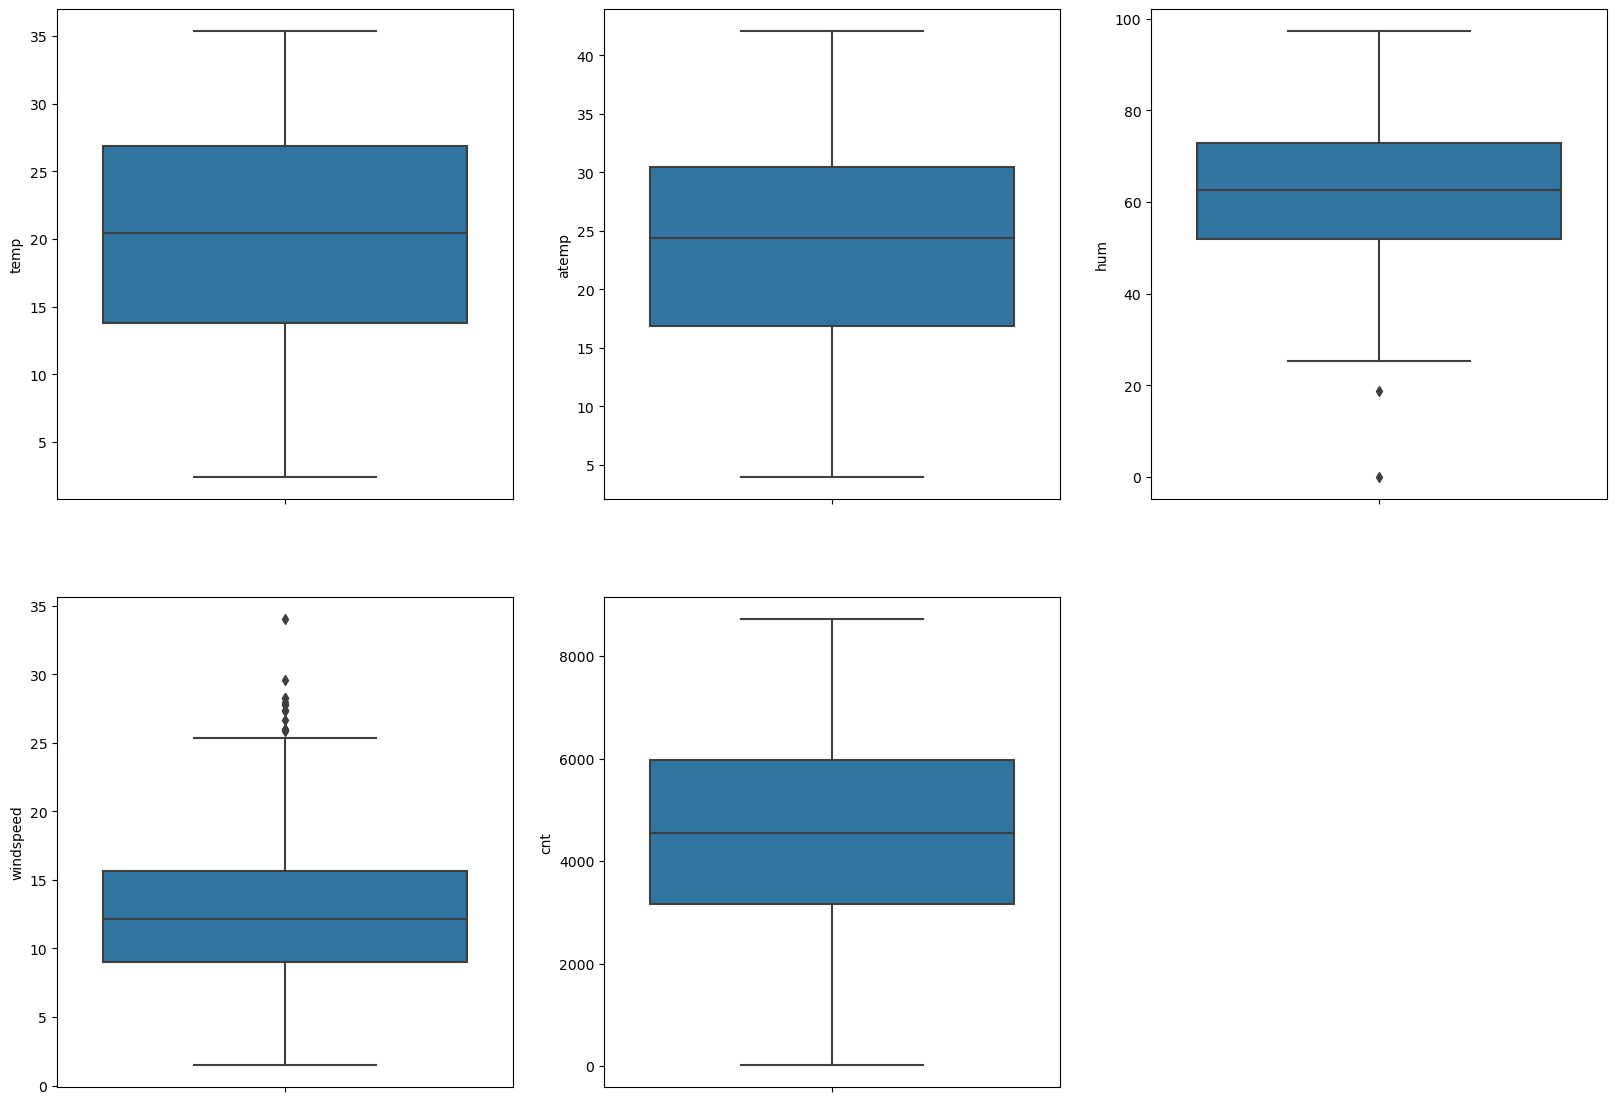

In [21]:
numericColumns = ['temp', 'atemp', 'hum', 'windspeed','cnt']
plt.figure(figsize=(20,14))

i = 1
for variables in numericColumns:
    plt.subplot(2,3,i)
    sns.boxplot(y=variables, data=bikeSharing)
    i+=1

Observation : Doesn't seem like any variables have outliers. Hence leave them as is.

### Visualize pairplots for continuous numeric variables


<Figure size 1500x3000 with 0 Axes>

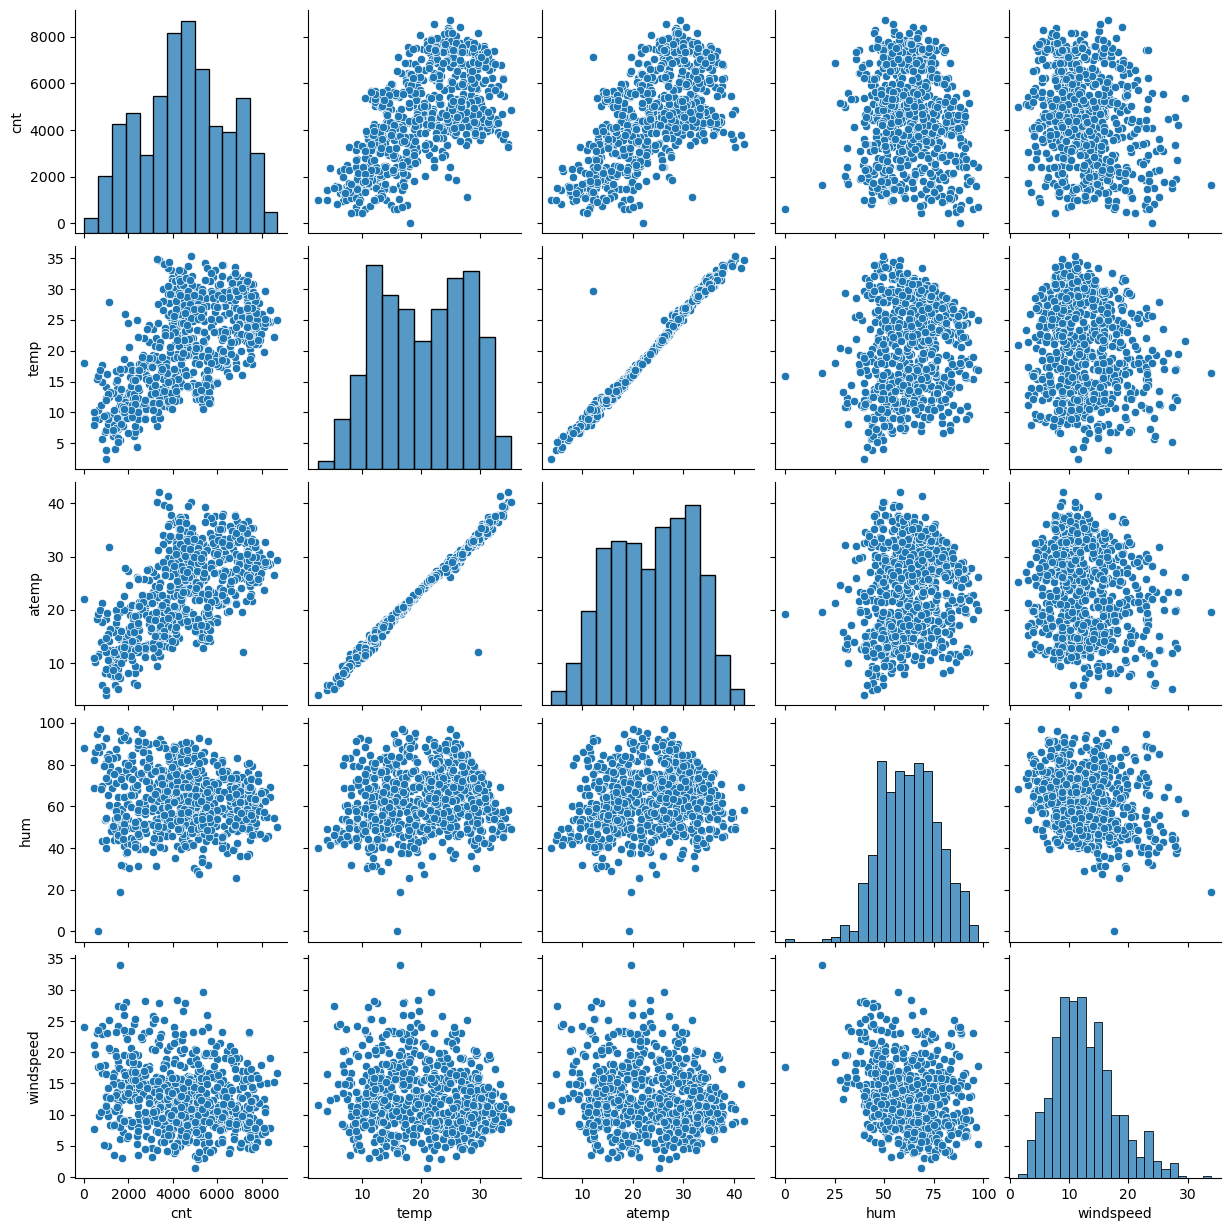

In [22]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Observation : At first glance cnt seems to have linear realtionship with temp and atemp

### Visualize correlation between continuous variables using heatmap


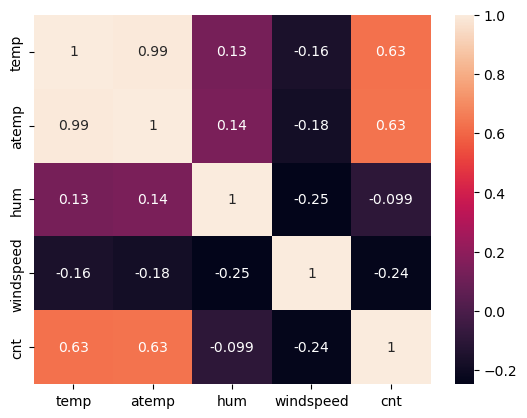

In [23]:
sns.heatmap(bikeSharing[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

### Observation : Correlation between temp and atemp is 0.99, which is pretty high indicating multi-colinearity. Hence we can use only one of them in analysis later

#### Visualising Categorical Variables


In [24]:
# Targe Variable is 'cnt' so let's plot some graphs

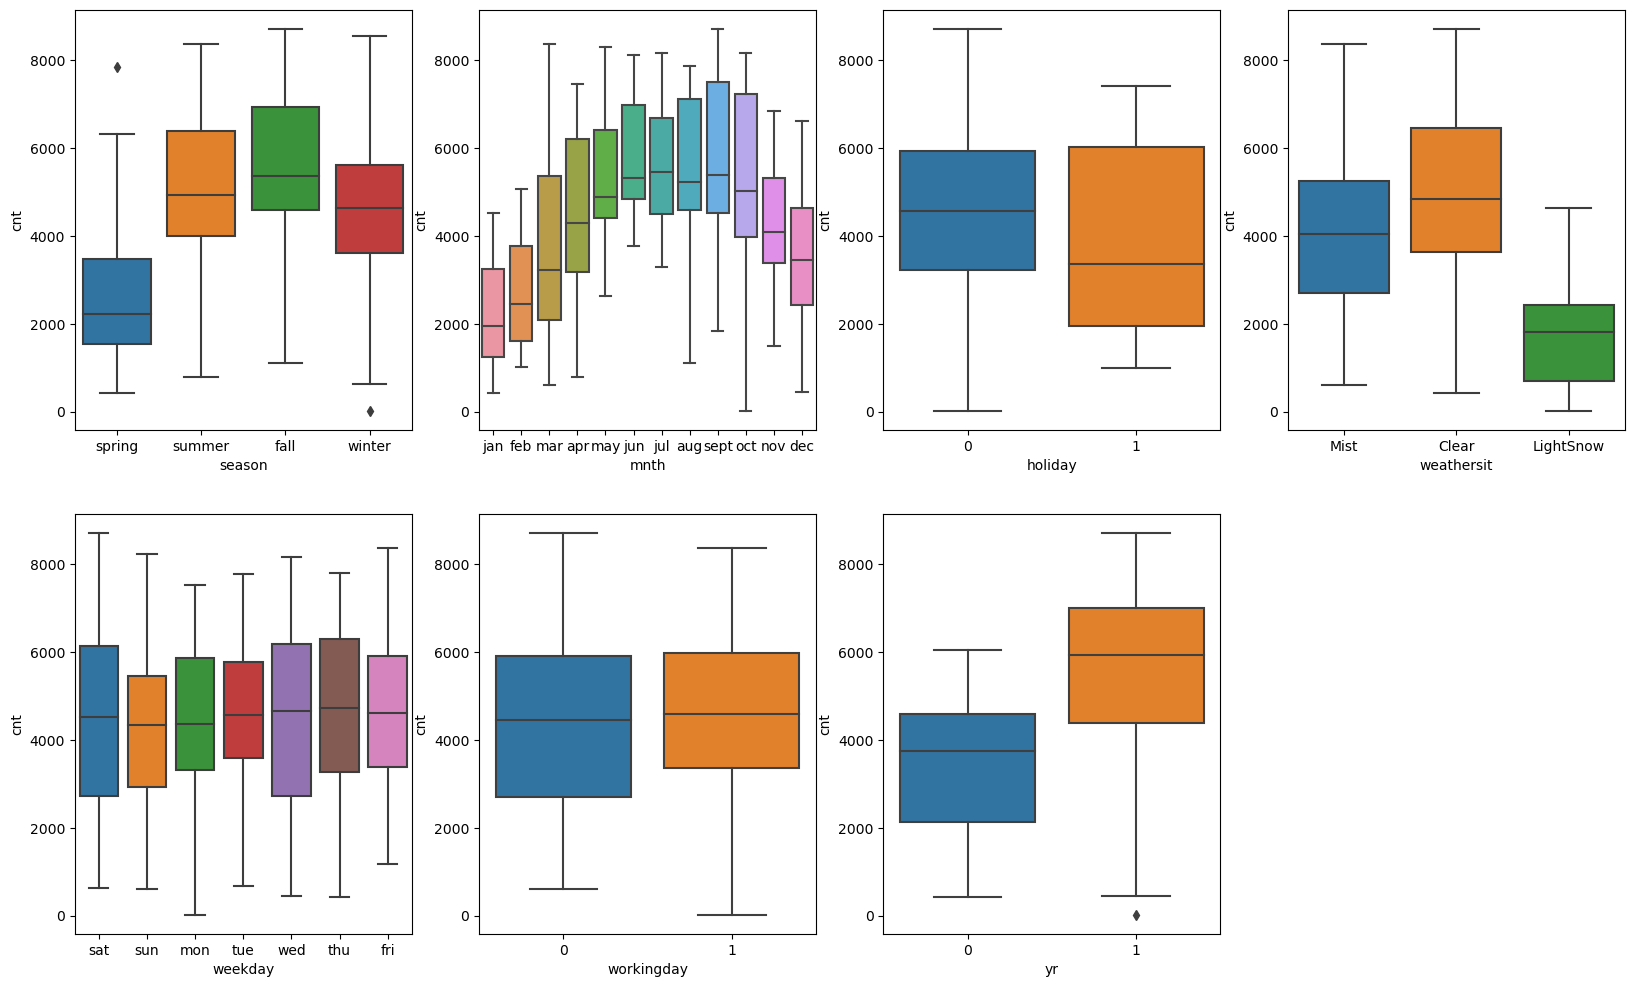

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing)
plt.show()

#### Observation :have higher bike rental count
- Clear weather
- fall season 
- months of summer to fall 
- Where as holidays see less rentals than working days 
- days of week don't seem to have much difference.

#### Dummy variables

Some of the variables seem to have multiple levels so let's create dummy variables for them

In [26]:
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
seasondummy = pd.get_dummies(bikeSharing['season'])
seasondummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


- We need n-1 dummy variables. Hence the following

In [28]:
seasondummy = pd.get_dummies(bikeSharing['season'], drop_first = True)
seasondummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, seasondummy], axis = 1)

In [30]:
monthdummy = pd.get_dummies(bikeSharing['mnth'])
monthdummy = pd.get_dummies(bikeSharing['mnth'], drop_first = True)
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, monthdummy], axis = 1)
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0


In [31]:
weekdaydummy = pd.get_dummies(bikeSharing['weekday'])
weekdaydummy = pd.get_dummies(bikeSharing['weekday'], drop_first = True)
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, weekdaydummy], axis = 1)
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,...,0,0,0,0,0,1,0,0,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,...,0,0,0,0,0,0,1,0,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,0,0,1,0,0,0,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,0,0,1,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,1


In [32]:
weathersitdummy = pd.get_dummies(bikeSharing['weathersit'])
weathersitdummy = pd.get_dummies(bikeSharing['weathersit'])
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, weathersitdummy], axis = 1)
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,1
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,...,0,0,0,1,0,0,0,0,0,1
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,1,0,0,0,0,0,1,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,0,0,0,1,0,1,0,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,1,1,0,0


In [33]:
bikeSharing.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [34]:
# drop the original columns after creating dummy variable columns

In [35]:
bikeSharing.drop(['season'], axis = 1, inplace = True)
bikeSharing.drop(['weathersit'], axis = 1, inplace = True)
bikeSharing.drop(['mnth'], axis = 1, inplace = True)
bikeSharing.drop(['weekday'], axis = 1, inplace = True)

In [36]:
bikeSharing.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [37]:
bikeSharing.shape

(730, 32)

In [38]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
print(df_train.shape)
print(df_test.shape)


(510, 32)
(219, 32)


In [40]:
df_train.columns


Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [41]:
df_test.columns


Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

### Rescaling the Features 


In [42]:
bikeSharing.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
0,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,1
2,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,1,0,0,0,0,0,1,0,0
3,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,1,0,0
4,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,1,0,0


#### Apply scaler() to all the columns except the categorical and 'dummy' variables


In [43]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
df_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
653,16-10-2019,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,...,0,0,0,0,0,1,0,1,0,0
576,31-07-2019,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,...,0,0,0,0,0,1,0,1,0,0
426,03-03-2019,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,...,0,0,1,0,0,0,0,0,0,1
728,30-12-2019,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,...,0,0,0,1,0,0,0,1,0,0
482,28-04-2019,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,...,0,0,1,0,0,0,0,0,0,1


In [45]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Cnt seemed to have linear realtion with temp and atemp so let's visualise the same

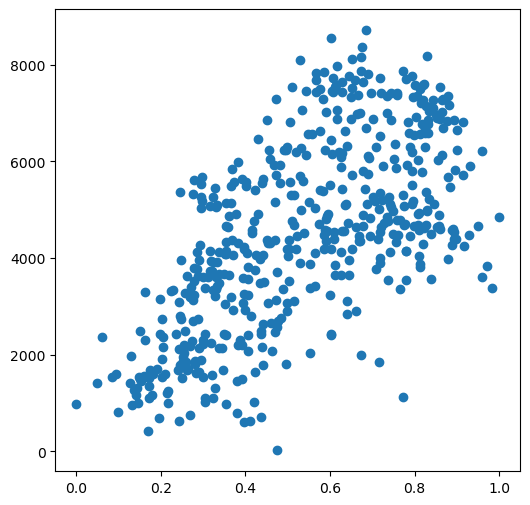

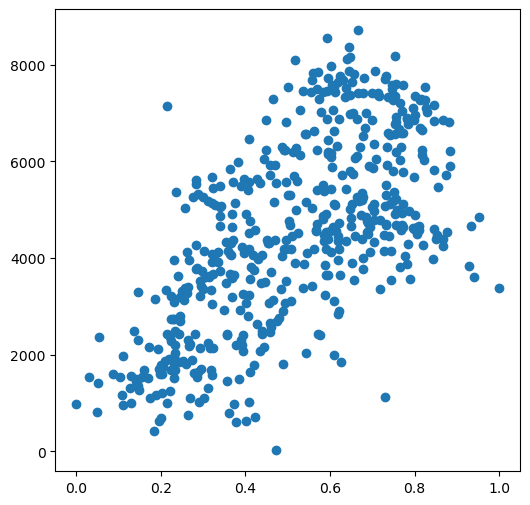

In [46]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [47]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model


## Model 1


In [48]:
import statsmodels.api as sm

In [49]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr0 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
X_train.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun',
       'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [51]:
lr0.params

const    1497.882426
temp     5562.458744
dtype: float64

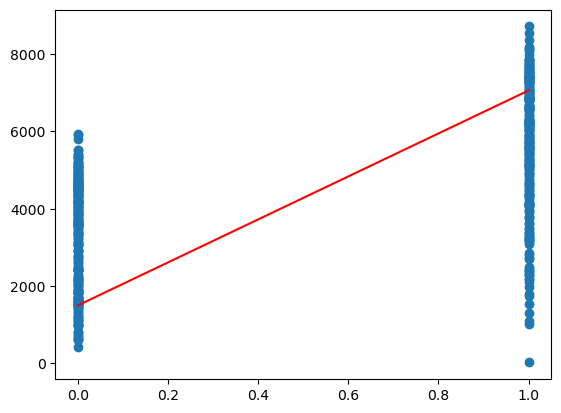

In [149]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1497.8 + 5562*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [53]:
# Print a summary of the linear regression model obtained
print(lr0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           5.80e-61
Time:                        14:25:40   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.0

#### Observation : P values are 0 so temp is significant . R-squared: 0.414 and Adj. R-squared:0.413 which is good

### Model 2 : Let's add one more variable workingday


In [54]:
# Assign all the feature variables to X

X_train_lm = sm.add_constant(X_train[['temp','workingday']])

lr1 = sm.OLS(y_train, X_train_lm).fit()

In [55]:
X_train.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun',
       'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [56]:
lr1.params

const         1375.319703
temp          5533.793152
workingday     203.946292
dtype: float64

In [57]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     180.9
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           4.92e-60
Time:                        14:25:40   Log-Likelihood:                -4449.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     507   BIC:                             8919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1375.3197    190.932      7.203      0.0

#### Observation : P values of workingday is insignificant . R-squared: 0.416 and Adj. R-squared:0.414 , not much improvemnet so let's remove workingday and build for other variable/s

### Model 3 :Let's add variable hum


In [58]:
# Assign all the feature variables to X
X_train_lm = sm.add_constant(X_train[['temp','hum']])

lr2 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
lr2.params

const    2806.551190
temp     5782.727945
hum     -2194.155695
dtype: float64

In [60]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     199.5
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.25e-64
Time:                        14:25:40   Log-Likelihood:                -4439.3
No. Observations:                 510   AIC:                             8885.
Df Residuals:                     507   BIC:                             8897.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2806.5512    316.326      8.872      0.0

#### Observation : P values are nsignificant after adding 'hum' . R-squared: 0.440 and Adj. R-squared:0.438 which is improvement from just 'temp'

### Model 4 :Adding all the variables to the model

In [61]:
X_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
653,16-10-2019,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,...,0,0,0,0,0,1,0,1,0,0
576,31-07-2019,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,0,0,1,0,1,0,0
426,03-03-2019,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,1,0,0,0,0,0,0,1
728,30-12-2019,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,0,0,0,1,0,0,0,1,0,0
482,28-04-2019,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,1,0,0,0,0,0,0,1


In [62]:
X_train.drop(['dteday'], axis = 1, inplace = True)

In [63]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [64]:
# Build linear model with all varibale
X_train_lm = sm.add_constant(X_train)

In [65]:
lr3 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          8.42e-181
Time:                        14:25:40   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1115.3262    256.724      4.344      0.0

#### Observation : Variables with high p values holiday, atemp, spring,summer, aug, dec, feb,jul,jun, mar,may,nov, oct, mon, sun, thu, tue, wed

### Dropping the variable based on VIP and updating the model


In [67]:
# Check for the VIF values of the feature variables. 


In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,Mist,inf
1,holiday,inf
2,workingday,inf
28,LightSnow,inf
27,Clear,inf
22,sat,inf
23,sun,inf
3,temp,67.12
4,atemp,56.09
7,spring,10.80


In [69]:
X = X_train.drop('atemp', 1,)

In [70]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr4 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          8.74e-182
Time:                        14:25:41   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1112.8521    256.404      4.340      0.000     609.044    1616.660
yr          2017.5498     70.005     28.820      0.000    1879.997    2155.103
holiday     -167.7935    202.116     -0.830      0.407    -564.930     229.343
workingday   587.7598     98.884      5.944      0.000     393.463     782.056
temp        3916.2822    402.328      9.734      0.000    3125.748    4706.816
hum        -1315.4477    334.443     -3.933      0.000   -1972.595    -658.301
windspeed  -1620.6522    223.329     -7.257      0.000   -2059.472   -1181.833
spring      -418.5981    260.478     -1.607      0.109    -930.411      93.215
summer       336.5944    227.730      1.478      0.140    -110.872     784.061
winter       920.0214    242.512      3.794      0.000     443.510    1396.533
aug          125.1994    292.671      0.428      0.669    -449.870     700.268
dec         -396.2326    291.836     -1.358      0.175    -969.661     177.195
feb         -280.5935    285.798     -0.982      0.327    -842.157     280.970
jan         -545.6541    291.390     -1.873      0.062   -1118.206      26.898
jul         -350.7228    304.698     -1.151      0.250    -949.424     247.978
jun          -25.8360    217.957     -0.119      0.906    -454.100     402.428
mar            9.0845    213.174      0.043      0.966    -409.781     427.950
may          208.0860    182.530      1.140      0.255    -150.567     566.739
nov         -363.7716    315.893     -1.152      0.250    -984.468     256.925
oct           65.4819    310.994      0.211      0.833    -545.589     676.553
sept         704.5726    278.125      2.533      0.012     158.086    1251.059
mon         -181.7213    133.066     -1.366      0.173    -443.182      79.739
sat          583.4546    112.598      5.182      0.000     362.211     804.699
sun          109.4312    115.760      0.945      0.345    -118.025     336.887
thu          -80.2858    134.832     -0.595      0.552    -345.217     184.645
tue         -164.1905    134.665     -1.219      0.223    -428.794     100.413
wed          -46.8282    129.428     -0.362      0.718    -301.140     207.484
Clear       1293.7780     99.831     12.960      0.000    1097.620    1489.936
LightSnow   -943.9147    188.387     -5.011      0.000   -1314.076    -573.754
Mist         762.9888    111.097      6.868      0.000     544.694     981.284
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     3.53e+15
==============================================================================

N

## It seems tedious to follow manual elimination method so switching to RFE

In [72]:
# Add required imports

In [151]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [152]:
rfe = RFE(lm,step =15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [153]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sept', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Clear', True, 1),
 ('LightSnow', True, 1),
 ('Mist', True, 1)]

In [154]:
col = X_train[['yr','holiday','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','sun','Clear','LightSnow','Mist']]
col = col.columns

In [155]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'winter',
       'jan', 'jul', 'sept', 'sat', 'sun', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [156]:
col = X_train.columns[rfe.support_]

In [157]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'winter',
       'jan', 'jul', 'sept', 'sat', 'sun', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [158]:
X_train.shape

(510, 30)

In [159]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [160]:
X_train_rfe.shape

(510, 15)

### Building model using statsmodel, for the detailed statistics

### Model 1 : RFE

In [162]:
col = X_train[['yr','holiday','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','sun','Clear','LightSnow','Mist']]
col.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'winter',
       'jan', 'jul', 'sept', 'sat', 'sun', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [163]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [164]:
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [165]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.04e-182
Time:                        14:34:23   Log-Likelihood:                -4132.0
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     496   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        690.0268    191.278      3.607      0.0

#### Observation : R-squared:0.832 , Adj. R-squared:0.828 values reduced from values before elimination. p value of 'sun' seems high. Let's visualize correlation and do VIF

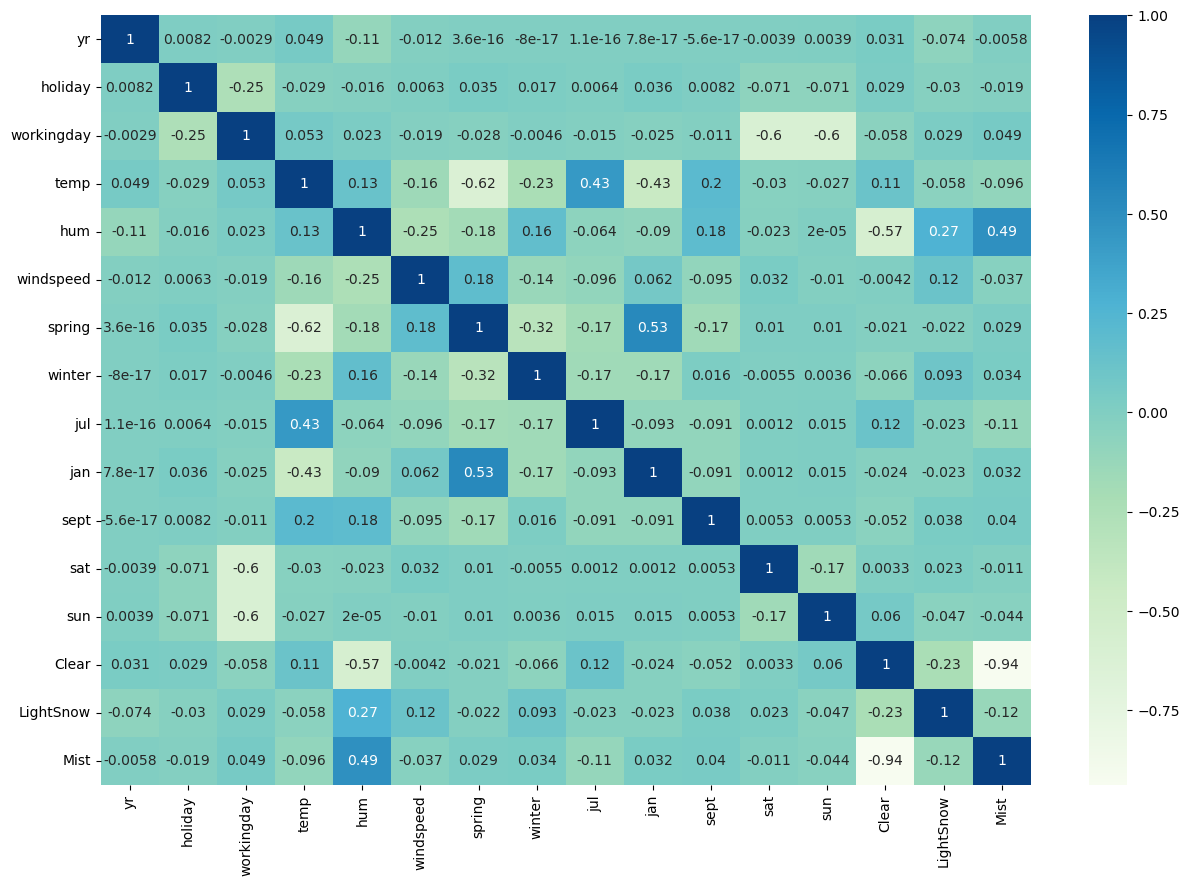

In [166]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing[['yr','holiday','workingday','temp','hum','windspeed',
                      'spring','winter','jul','jan','sept','sat','sun','Clear','LightSnow','Mist']].corr(), cmap='GnBu', annot=True)
plt.show()

In [86]:
#Function to calculate VIFs and print them using the columns for which VIF to be calcualted as a parameter
def calculateVIF(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [87]:
calculateVIF(col)

      Features   VIF
1      holiday   inf
2   workingday   inf
10         sat   inf
11         sun   inf
12       Clear   inf
13   LightSnow   inf
14        Mist   inf
3         temp  2.05
4          hum  1.89
7          jan  1.45
8          jul  1.30
6       winter  1.29
5    windspeed  1.19
9         sept  1.11
0           yr  1.03


### Model 2 : RFE, eliminate variable 'sun'(Sunday) as p value was high and VIF is inf

In [88]:
col = X_train[['yr','holiday','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','Clear','LightSnow','Mist']]
col = col.columns

In [89]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [90]:
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.04e-182
Time:                        14:25:41   Log-Likelihood:                -4132.0
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     496   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        767.9324    236.025      3.254      0.0

In [91]:
calculateVIF(col)

      Features    VIF
11       Clear  35.60
13        Mist  26.16
12   LightSnow   3.76
3         temp   2.05
4          hum   1.89
2   workingday   1.88
10         sat   1.78
7          jan   1.45
8          jul   1.30
6       winter   1.29
5    windspeed   1.19
1      holiday   1.16
9         sept   1.11
0           yr   1.03


### Model 3 : 'Clear' variable has high VIF so let's remove that

In [92]:
col = X_train[['yr','holiday','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','LightSnow','Mist']]
col = col.columns

In [93]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [94]:
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.04e-182
Time:                        14:25:41   Log-Likelihood:                -4132.0
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     496   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1898.4855    270.156      7.027      0.0

In [95]:
calculateVIF(col)

      Features    VIF
4          hum  19.57
3         temp  12.52
2   workingday   5.09
5    windspeed   3.76
12        Mist   2.14
0           yr   2.05
10         sat   1.92
6       winter   1.68
7          jan   1.48
8          jul   1.41
9         sept   1.20
11   LightSnow   1.19
1      holiday   1.16


### Model 4 : variable 'hum'(humidity) has high VIF so let's remove that

In [96]:
col = X_train[['yr','holiday','workingday','temp','windspeed',
                      'winter','jan','jul','sept','sat','LightSnow','Mist']]
col = col.columns

In [97]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [98]:
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.41e-180
Time:                        14:25:41   Log-Likelihood:                -4139.8
No. Observations:                 510   AIC:                             8306.
Df Residuals:                     497   BIC:                             8361.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1143.0886    192.665      5.933      0.0

In [99]:
calculateVIF(col)

      Features   VIF
3         temp  6.32
2   workingday  4.69
4    windspeed  3.59
0           yr  2.05
9          sat  1.84
11        Mist  1.55
7          jul  1.37
5       winter  1.36
6          jan  1.26
8         sept  1.20
1      holiday  1.14
10   LightSnow  1.09


In [100]:
# plot few more models using different variblle untill R2 is good, VIF is low and p is 0

### Model 5 : variable 'temp' has high VIF so let's remove that

In [101]:
col = X_train[['yr','holiday','workingday','windspeed',
                      'winter','jan','jul','sept','sat','LightSnow','Mist']]
col = col.columns

In [102]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [103]:
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     89.66
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.57e-110
Time:                        14:25:41   Log-Likelihood:                -4308.8
No. Observations:                 510   AIC:                             8642.
Df Residuals:                     498   BIC:                             8692.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4097.9296    188.871     21.697      0.0

In [104]:
calculateVIF(col)

      Features   VIF
2   workingday  3.34
3    windspeed  3.28
0           yr  1.89
8          sat  1.59
10        Mist  1.54
4       winter  1.36
5          jan  1.15
1      holiday  1.11
6          jul  1.11
7         sept  1.11
9    LightSnow  1.08


#### Observation : as we can see R2 and Adj R2 dropped significantly so let's keep temp 

#### Model 6: Also 'jul' and 'temp' had high correlation(heatmap) hence let's remove jul and add back 'temp'

In [105]:
col = X_train[['temp','yr','holiday','workingday','windspeed',
                      'winter','jan','sept','sat','LightSnow','Mist']]
col = col.columns

In [106]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [107]:
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          4.27e-178
Time:                        14:25:42   Log-Likelihood:                -4148.5
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     498   BIC:                             8372.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1248.6813    194.049      6.435      0.0

In [108]:
calculateVIF(col)

      Features   VIF
0         temp  5.13
3   workingday  4.63
4    windspeed  3.54
1           yr  2.04
8          sat  1.84
10        Mist  1.54
5       winter  1.34
6          jan  1.26
7         sept  1.16
2      holiday  1.14
9    LightSnow  1.08


#### Observation :now R2 and Adj R2 seem good. Let's continue

#### Model 7: 'jan' and 'spring' had high correlation(heatmap) hence let's remove jan and add 'spring'

In [109]:
col = X_train[['temp','yr','holiday','workingday','windspeed',
                      'winter','sept','sat','LightSnow','Mist','spring']]
col = col.columns

In [110]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe7 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [111]:
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.2
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.13e-185
Time:                        14:25:42   Log-Likelihood:                -4130.6
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     498   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1980.1524    223.108      8.875      0.0

In [112]:
calculateVIF(col)

      Features   VIF
0         temp  5.70
3   workingday  4.93
4    windspeed  4.10
1           yr  2.06
7          sat  1.90
10      spring  1.88
9         Mist  1.53
5       winter  1.47
2      holiday  1.16
6         sept  1.16
8    LightSnow  1.08


#### Observation : Slight increase in R2 and Adj R2 also F stat is improving

#### Model 8: Let's replace 'sat' with 'sun'

In [113]:
col = X_train[['temp','yr','holiday','workingday','windspeed',
                      'winter','sept','sun','LightSnow','Mist','spring']]
col = col.columns

In [114]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe8 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [115]:
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.2
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.13e-185
Time:                        14:25:42   Log-Likelihood:                -4130.6
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     498   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2482.0351    222.067     11.177      0.0

In [116]:
calculateVIF(col)

      Features   VIF
0         temp  5.77
3   workingday  4.65
4    windspeed  4.02
1           yr  2.06
10      spring  1.88
7          sun  1.77
9         Mist  1.51
5       winter  1.49
6         sept  1.16
2      holiday  1.15
8    LightSnow  1.08


#### Model 9: p value of workingday has increased hence remove that

In [117]:
col = X_train[['temp','yr','holiday','windspeed',
                      'winter','sept','sun','LightSnow','Mist','spring']]
col = col.columns

In [118]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe9 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [119]:
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.02e-186
Time:                        14:25:42   Log-Likelihood:                -4131.0
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2408.9852    206.032     11.692      0.0

In [120]:
calculateVIF(col)

    Features   VIF
3  windspeed  3.95
0       temp  3.83
1         yr  2.05
9     spring  1.66
8       Mist  1.50
4     winter  1.39
6        sun  1.18
5       sept  1.16
7  LightSnow  1.08
2    holiday  1.05


#### Observation : 
- R2 is 0.833 
- Adj R2 is 0.830
- F stat is 248.8, has also improved after removing workingday

### The model-> lm_rfe9 seems good so let's Analyse and evaluate


In [121]:
col = X_train[['temp','yr','windspeed',
                      'winter','sept','sun','LightSnow','Mist','spring']]
col = col.columns

In [122]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe10 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [123]:
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.7
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.48e-184
Time:                        14:25:42   Log-Likelihood:                -4139.0
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     500   BIC:                             8340.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2387.8582    209.009     11.425      0.0

## Step 7: Residual Analysis of the train data


In [124]:
y_train_pred = lm_rfe10.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

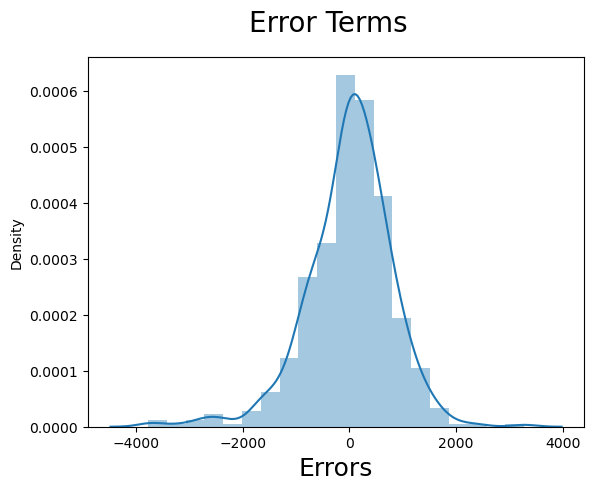

In [125]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

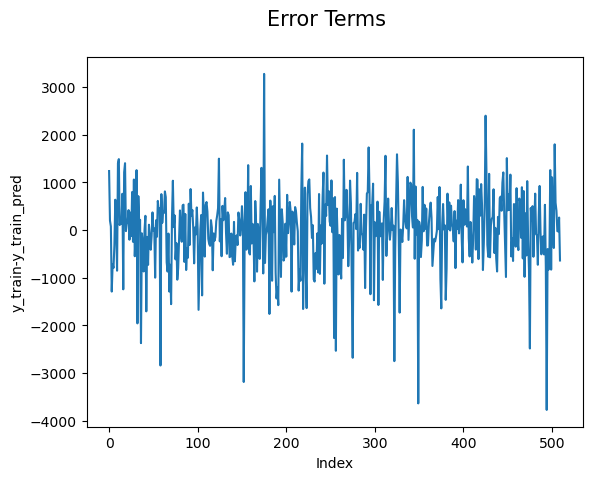

In [126]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Observation : Error terms are normally distributed

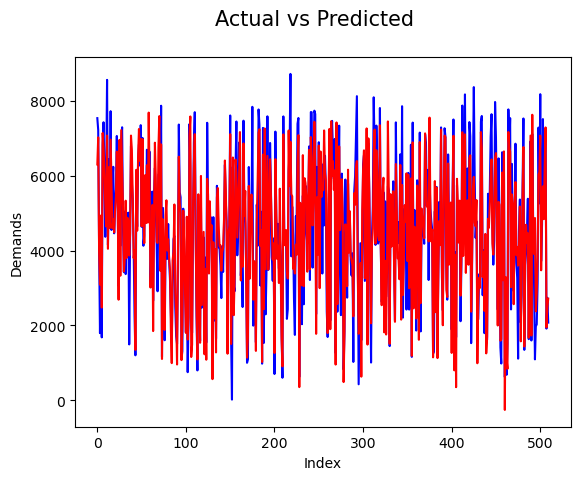

In [127]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Observation : Actual and Predicted result seem to follow same pattern so this model seems good

In [128]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8276271388649432

## Observation : r2_score is same to what we got in Model 9

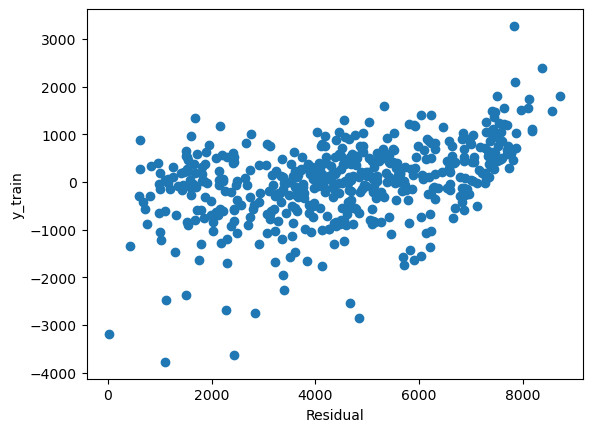

In [129]:
# Scatter plot to the check Linearity
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final  model.

### Applying the scaling on the test sets
##### We never fit the scalar on test data set, we only transform() 
- this is because test should not learn, only training data set should be used to learn the model 
- test data is used to predict

In [130]:
df_test.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [131]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [132]:
df_test.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [133]:
df_test.shape

(219, 32)

In [134]:
df_test.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
184,04-07-2018,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,...,0,1,0,0,0,0,0,0,0,1
535,20-06-2019,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,...,0,0,0,0,0,0,1,1,0,0
299,27-10-2018,0,0,1,0.511964,0.496145,0.837699,0.334206,2659,0,...,0,0,0,0,1,0,0,0,0,1
221,10-08-2018,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,...,0,0,0,0,0,0,1,1,0,0
152,02-06-2018,0,0,1,0.817246,0.741471,0.314298,0.537414,4968,0,...,0,0,0,0,1,0,0,1,0,0


In [135]:
y_test = df_test.pop('cnt')
X_test = df_test

In [136]:
# Adding constant variable to test dataframe
X_test_m9 = sm.add_constant(X_test)
X_test_m9.head()

,const,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
184,1.0,04-07-2018,0,1,0,0.831783,0.769660,0.657364,0.084219,0,...,0,1,0,0,0,0,0,0,0,1
535,1.0,20-06-2019,1,0,1,0.901354,0.842587,0.610133,0.153728,0,...,0,0,0,0,0,0,1,1,0,0
299,1.0,27-10-2018,0,0,1,0.511964,0.496145,0.837699,0.334206,0,...,0,0,0,0,1,0,0,0,0,1
221,1.0,10-08-2018,0,0,1,0.881625,0.795343,0.437098,0.339570,0,...,0,0,0,0,0,0,1,1,0,0
152,1.0,02-06-2018,0,0,1,0.817246,0.741471,0.314298,0.537414,0,...,0,0,0,0,1,0,0,1,0,0


In [137]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [138]:
X_test_m9.columns

Index(['const', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [139]:
X_test_m9 = X_test_m9.drop(['const', 'dteday', 'atemp',
        'summer',  'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sat',
       'thu', 'tue', 'wed', 'Clear','workingday' ], axis = 1)

In [140]:
X_test_m9.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'sept',
       'sun', 'LightSnow', 'Mist'],
      dtype='object')

In [141]:
X_train_rfe.shape

(510, 10)

In [142]:
X_test_m9.shape


(219, 11)

In [143]:
#Columns from our final model
# cols = ['yr', 'spring', 'jul',
#         'winter', 'sept', 'sun',
#        'Mist', 'LightSnow', 'temp']

#Predict the values for test data
y_test_pred = lm_rfe9.predict(X_test_m9)

In [144]:
#Next find r2 and plot graph

## Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

In [145]:
from sklearn.metrics import r2_score

In [146]:
r2_score(y_true= y_test , y_pred= y_test_pred) # this is r2_score on test set , recall it was 0.83 on training set

-3.4614534552649303

Text(0, 0.5, 'y_pred')

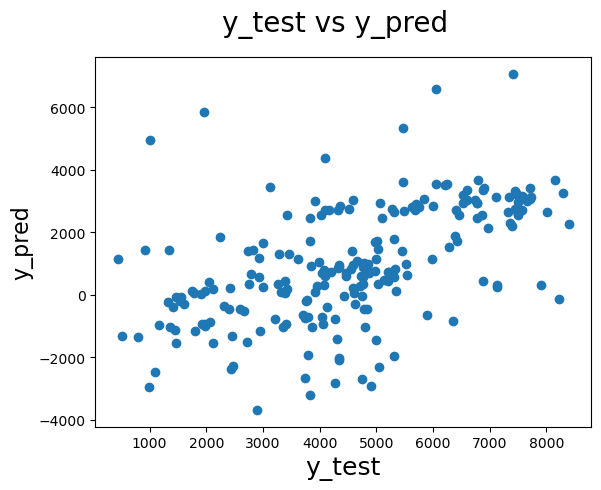

In [147]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      